In [56]:

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy import stats
import time

def get_joint(x, y, z, rv):
    
    p = rv.pdf([x, y, z])
    
        
    return p

def visualize_3d(nb_pts, rv, mean):
    
    x = np.linspace(stats.norm.ppf(0.10), stats.norm.ppf(0.90), nb_pts) + mean[0]
    y = np.linspace(stats.norm.ppf(0.10), stats.norm.ppf(0.90), nb_pts) + mean[1]
    z = np.linspace(stats.norm.ppf(0.10), stats.norm.ppf(0.90), nb_pts) + mean[2]

    # Getting joint probabilities
    start = time.time()
    p = np.zeros((nb_pts,nb_pts, nb_pts))
    for idx_x in range (nb_pts): # x, y, z
        for idx_y in range (nb_pts): # x, y, z
            for idx_z in range (nb_pts): # x, y, z   
                p[idx_x, idx_y, idx_z] = get_joint(x[idx_x], y[idx_y], z[idx_z], rv)

    stop = time.time()
    elapsed = stop - start
    print("Joint probabilities obtained after: " + str(int(elapsed)) + " seconds.")

    # Creating figure
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")

    idx = p > 0.3

    # Creating plot
    xx, yy, zz = np.meshgrid(x, y, z)
    ax.scatter3D(xx[idx], yy[idx], zz[idx], c=p[idx], cmap='viridis', vmin=0, vmax=10, marker='.')

#     xs = np.linspace(-1, 1, nb_pts)
#     ys = np.linspace(-1, 1, nb_pts)
#     zs = np.linspace(-1, 1, nb_pts)

#     X, Y = np.meshgrid(xs, ys)
#     Z = np.ones((nb_pts,nb_pts))*mu[2]
#     ax.plot_surface(Y, X, Z, alpha=0.2, color='k')

#     Y, Z = np.meshgrid(ys, zs)
#     X = np.ones((nb_pts,nb_pts))*mu[0]
#     ax.plot_surface(Y, X, Z, alpha=0.2, color='k')

#     X, Z = np.meshgrid(xs, zs)
#     Y = np.ones((nb_pts,nb_pts))*mu[1]
#     ax.plot_surface(Y, X, Z, alpha=0.2, color='k')

#     ax.set_xlim([-1, 1])
#     ax.set_ylim([-1, 1])
#     ax.set_zlim([-1, 1])
#     ax.set_xticks(np.linspace(-1, 1, 21))
#     ax.set_yticks(np.linspace(-1, 1, 21))
#     ax.set_zticks(np.linspace(-1, 1, 21))
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('z')

    plt.show()  

    


if __name__ == '__main__':
    
    nb_pts = 100
    
    mean = np.array([0, 3, 2])
    cov = np.array([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.3]])
    
    C = np.random.random((3, 3))
    Σ = 0.1*(C @ C.T) # positive semi-definite
    
#     Σ[0,0] = 0.5
#     Σ[1,1] = 0.3
#     Σ[2,2] = 0.7
    print(Σ)

    rv = multivariate_normal(mean, Σ)
    
    

[[0.11873058 0.08127847 0.08945258]
 [0.08127847 0.13924776 0.07641883]
 [0.08945258 0.07641883 0.09276547]]


Joint probabilities obtained after: 14 seconds.


<IPython.core.display.Javascript object>


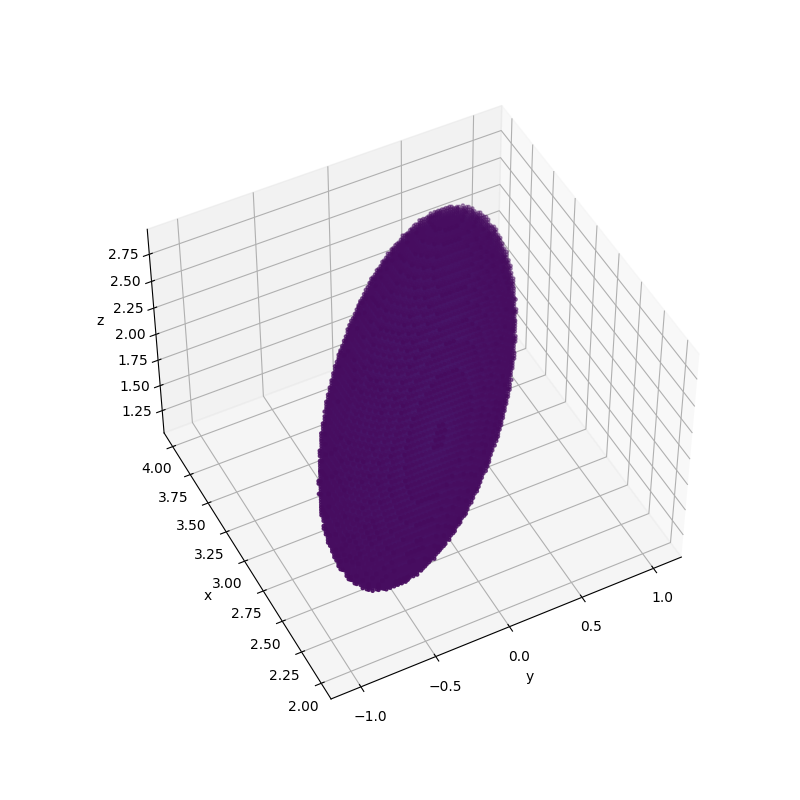

In [57]:
visualize_3d(nb_pts, rv, mean)

In [ ]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 0.5 , 0], [0,  5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal


# Sample parameters
mu = np.array([0, 0])
sigma = np.array([[0.7, 0.2], [0.2, 0.3]])
rv = multivariate_normal(mu, sigma)
sample = rv.rvs(500)

# Bounds parameters
x_abs = 2.5
y_abs = 2.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# The heatmap
ax.contourf(x_grid, y_grid, 0.1 * rv.pdf(pos),
            zdir='z', levels=0.1 * levels, alpha=0.9)

# The wireframe
ax.plot_wireframe(x_grid, y_grid, rv.pdf(
    pos), rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
ax.scatter(sample[:, 0], sample[:, 1], 1.05 * rv.pdf(sample), c='k')

ax.legend()
ax.set_title("Gaussian sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)

plt.show()